#### Data Preporcessing

In [1]:
#importing needed libraries
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [11]:
#Loading data for positive cases and deaths due to Covid across NY Zips
data = pd.read_csv('coronavirus-data-master/tests-by-zcta.csv')
data.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos
0,NaN,5278,5607,94.13
1,10001.0,321,1130,28.41
2,10002.0,931,2457,37.89
3,10003.0,414,1549,26.73
4,10004.0,28,108,25.93


In [5]:
#Loading ZCTA to MODZCTA conversion file
geo_convert = pd.read_csv('coronavirus-data-master/Geography-resources/ZCTA-to-MODZCTA.csv')

In [6]:
geo_convert.head()

,ZCTA,MODZCTA
0,10001,10001
1,10002,10002
2,10003,10003
3,10004,10004
4,10005,10005


In [13]:
#Dropping NAs
data = data.dropna()

In [16]:
data2 = data.merge(geo_convert['ZCTA'], how="left", left_on = data['MODZCTA'], right_on=geo_convert['MODZCTA'])
data2 = data2.drop(columns='key_0')
data2.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos,ZCTA
0,10001.0,321,1130,28.41,10001
1,10001.0,321,1130,28.41,10119
2,10001.0,321,1130,28.41,10199
3,10002.0,931,2457,37.89,10002
4,10003.0,414,1549,26.73,10003


In [18]:
#Loading NY Zip Shapefile
spatial_data = gpd.read_file('coronavirus-data-master/Geography-resources/MODZCTA_2010.shp')
spatial_data.head()

,MODZCTA,label,geometry
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21..."
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19..."
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20..."
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958...."
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19..."


In [21]:
#Loading demographic data
dem_data = pd.read_csv('ACS_ZipCodelevel_2018.csv')
dem_data.head()

,geo_id,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,...,pop_determined_poverty_status,poverty,gini_index,county,city,zip_code,internal_point_lat,internal_point_lon,area_land_meters,area_water_meters
0,12742,90,36,54,63.2,77,0,0,13,0,...,90,4,0.3478,Sullivan,Harris,12742,41.724328,-74.723518,5570618,20998
1,14039,92,49,43,29.7,92,0,0,0,0,...,92,13,0.3717,Wyoming,Dale,14039,42.851479,-78.173096,4838845,0
2,12927,262,138,124,60.7,262,0,0,0,0,...,262,50,0.4166,St. Lawrence County,Cranberry Lake CDP,12927,44.207250,-74.809746,286441522,34224411
3,11956,212,105,107,56.9,202,10,0,0,0,...,212,24,0.4219,Suffolk County,"Cutchogue CDP, New Suffolk CDP",11956,40.969049,-72.462175,3284726,157808
4,13345,174,91,83,42.2,164,10,0,0,0,...,174,27,0.4237,NaN,Utica,13345,43.687108,-75.321254,12791341,42214


In [22]:
#Making conversions of string types to facilitate joins
data2.MODZCTA=data2.MODZCTA.astype(int)
spatial_data.MODZCTA = spatial_data.MODZCTA.astype(int)

In [37]:
#Merging required data
fdf = spatial_data.merge(data2[['Positive','Total','zcta_cum.perc_pos','ZCTA']], how='left',left_on=spatial_data.MODZCTA,right_on=data.MODZCTA)
fdf = fdf.drop(columns='key_0')
fdf.head()

,MODZCTA,label,geometry,Positive,Total,zcta_cum.perc_pos
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",931.0,2457.0,37.89
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",414.0,1549.0,26.73
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958....",28.0,108.0,25.93
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19...",54.0,256.0,21.09


In [38]:
fdf = fdf.merge(dem_data, how='left',left_on=fdf.MODZCTA,right_on=dem_data.geo_id)
fdf = fdf.drop(columns='key_0')
fdf.head()

,MODZCTA,label,geometry,Positive,Total,zcta_cum.perc_pos,geo_id,total_pop,male_pop,female_pop,...,pop_determined_poverty_status,poverty,gini_index,county,city,zip_code,internal_point_lat,internal_point_lon,area_land_meters,area_water_meters
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10001.0,22924.0,11671.0,11253.0,...,21955.0,2912.0,0.5728,"Bronx County, Kings County, New York County, Q...",New York city,10001.0,40.750636,-73.997177,1591494.0,0.0
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",931.0,2457.0,37.89,10002.0,74993.0,36230.0,38763.0,...,74356.0,20565.0,0.5838,"Bronx County, Kings County, New York County, Q...",New York city,10002.0,40.715776,-73.986211,2275174.0,0.0
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",414.0,1549.0,26.73,10003.0,54682.0,27503.0,27179.0,...,45093.0,3812.0,0.5571,"Bronx County, Kings County, New York County, Q...",New York city,10003.0,40.731829,-73.989181,1493003.0,0.0
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958....",28.0,108.0,25.93,10004.0,3028.0,1267.0,1761.0,...,3028.0,66.0,0.4393,"Bronx County, Kings County, New York County, Q...",New York city,10004.0,40.688873,-74.018213,1394739.0,10096.0
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19...",54.0,256.0,21.09,10005.0,8831.0,4003.0,4828.0,...,8831.0,840.0,0.4414,"Bronx County, Kings County, New York County, Q...",New York city,10005.0,40.706004,-74.008785,188254.0,0.0


In [39]:
fdf.shape

(178, 74)

In [40]:
#Getting centroid values and removing data for Alaska
fdf["Longitude"] = fdf.centroid.map(lambda p: p.x)
fdf["Latitude"] = fdf.centroid.map(lambda p: p.y)
fdf.head()

,MODZCTA,label,geometry,Positive,Total,zcta_cum.perc_pos,geo_id,total_pop,male_pop,female_pop,...,gini_index,county,city,zip_code,internal_point_lat,internal_point_lon,area_land_meters,area_water_meters,Longitude,Latitude
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10001.0,22924.0,11671.0,11253.0,...,0.5728,"Bronx County, Kings County, New York County, Q...",New York city,10001.0,40.750636,-73.997177,1591494.0,0.0,985043.105180,212772.631903
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",931.0,2457.0,37.89,10002.0,74993.0,36230.0,38763.0,...,0.5838,"Bronx County, Kings County, New York County, Q...",New York city,10002.0,40.715776,-73.986211,2275174.0,0.0,988082.687539,200054.876532
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",414.0,1549.0,26.73,10003.0,54682.0,27503.0,27179.0,...,0.5571,"Bronx County, Kings County, New York County, Q...",New York city,10003.0,40.731829,-73.989181,1493003.0,0.0,987254.422536,205900.824488
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958....",28.0,108.0,25.93,10004.0,3028.0,1267.0,1761.0,...,0.4393,"Bronx County, Kings County, New York County, Q...",New York city,10004.0,40.688873,-74.018213,1394739.0,10096.0,980636.710629,195670.686979
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19...",54.0,256.0,21.09,10005.0,8831.0,4003.0,4828.0,...,0.4414,"Bronx County, Kings County, New York County, Q...",New York city,10005.0,40.706004,-74.008785,188254.0,0.0,981790.705917,196527.891531


In [41]:
#Loading libraries for spatial analysis
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

In [52]:
fdf.dtypes

MODZCTA                  int64
label                   object
geometry              geometry
Positive               float64
Total                  float64
                        ...   
internal_point_lon     float64
area_land_meters       float64
area_water_meters      float64
Longitude              float64
Latitude               float64
Length: 76, dtype: object

In [65]:
fdf = fdf.dropna()

In [66]:
fdf['Positive'] = fdf['Positive'].astype(int)
fdf['median_income'] = fdf['median_income'].astype(int)

In [81]:
data2

,MODZCTA,Positive,Total,zcta_cum.perc_pos,ZCTA
0,10001,321,1130,28.41,10001
1,10001,321,1130,28.41,10119
2,10001,321,1130,28.41,10199
3,10002,931,2457,37.89,10002
4,10003,414,1549,26.73,10003
...,...,...,...,...,...
209,11691,2056,4246,48.42,11691
210,11692,540,1211,44.59,11692
211,11693,301,713,42.22,11693
212,11694,649,1596,40.66,11694


In [84]:
#Merges 
df = spatial_data.merge(data2[['Positive','Total','zcta_cum.perc_pos','ZCTA']], how='left',left_on=spatial_data.MODZCTA,right_on=data2.MODZCTA)
df = df.drop(columns='key_0')
df.head()

,MODZCTA,label,geometry,Positive,Total,zcta_cum.perc_pos,ZCTA
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10001.0
1,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10119.0
2,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10199.0
3,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",931.0,2457.0,37.89,10002.0
4,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",414.0,1549.0,26.73,10003.0


In [86]:
df = df.dropna()

In [87]:
df = df.merge(dem_data, how='left',left_on=df.ZCTA,right_on=dem_data.geo_id)
df = df.drop(columns='key_0')
df.head()

,MODZCTA,label,geometry,Positive,Total,zcta_cum.perc_pos,ZCTA,geo_id,total_pop,male_pop,...,pop_determined_poverty_status,poverty,gini_index,county,city,zip_code,internal_point_lat,internal_point_lon,area_land_meters,area_water_meters
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10001.0,10001,22924,11671,...,21955,2912,0.5728,"Bronx County, Kings County, New York County, Q...",New York city,10001,40.750636,-73.997177,1591494,0
1,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10119.0,10119,0,0,...,0,0,NaN,"Bronx County, Kings County, New York County, Q...",New York city,10119,40.750310,-73.992979,42613,0
2,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",321.0,1130.0,28.41,10199.0,10199,148,47,...,148,78,NaN,"Bronx County, Kings County, New York County, Q...",New York city,10199,40.751383,-73.997152,65414,0
3,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",931.0,2457.0,37.89,10002.0,10002,74993,36230,...,74356,20565,0.5838,"Bronx County, Kings County, New York County, Q...",New York city,10002,40.715776,-73.986211,2275174,0
4,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",414.0,1549.0,26.73,10003.0,10003,54682,27503,...,45093,3812,0.5571,"Bronx County, Kings County, New York County, Q...",New York city,10003,40.731829,-73.989181,1493003,0


In [88]:
df.shape

(214, 75)

In [97]:
ziplist=[11697,11694,11692,11691,11693,10303,10302,10310,10301,10304,10305,10306,10314,10308,10312,10309,10307]
df = df[~df['MODZCTA'].isin(ziplist)]
df.shape

(196, 75)

In [104]:
df = df.dropna()

#### Correlation between income and cases

In [145]:
df[['Positive','median_income']].corr()

,Positive,median_income
Positive,1.000000,-0.576718
median_income,-0.576718,1.000000


Negative correlation - High Income Low Cases and vice versa

#### Purely Spatial - seeing if positive cases are clustered together across a few neighborhoods

In [134]:
y = df['Positive'].values
moran = Moran(y,w)
moran.I

0.536748816098759

Positive correlation amongst neighborhoods exist

#### Visulasing the dispersion of High and Low Cases across geography

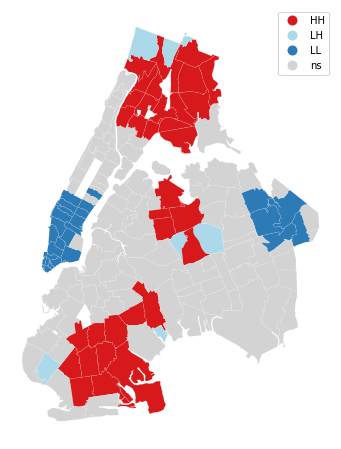

In [172]:
moran_loc = Moran_Local(y, w)
lisa_cluster(moran_loc, df, p=0.05, figsize = (8,8))
plt.show()

Dark Red : All High Reported Cases Clustered Together 

Dark Blue : All Low Reported Cases Clustered Together 

Light Blue : Low Reported Cases clustered new High Reported Cases (A type of outlier)

#### Can we correlate income distribution with space? 

In [136]:
x = df['median_income'].values
moran_x = Moran(x,w)
moran_x.I

0.7275384813556492

High Positive Correlation Exists

#### Visualising Income Over Space

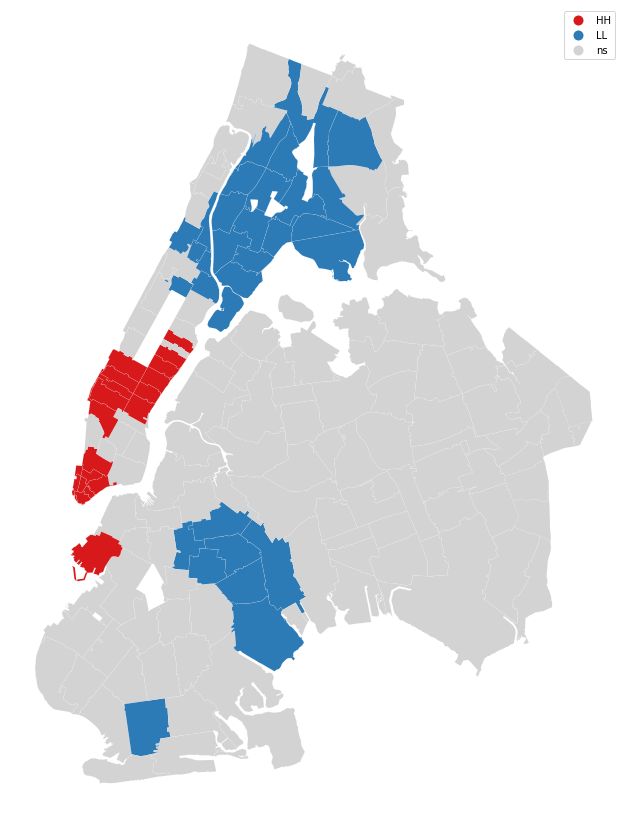

In [137]:
moran_loc_x = Moran_Local(x, w)
lisa_cluster(moran_loc_x, df, p=0.05, figsize = (20,15))
plt.show()

Dark Red : High Income Population Clustered Together

Dark Blue : Low Income Population Clustered Together

**To find if geography combined with demographic factors (socioeconomic factors) play a role in aggravating the spread of the virus - we do a bivariate correlation between income and cases occuring close to each other**

## Bivariate Correlation 

In [138]:
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

-0.4885267427418704

Negative correlation implies dissimilarity in how geography affects populations when demography is included

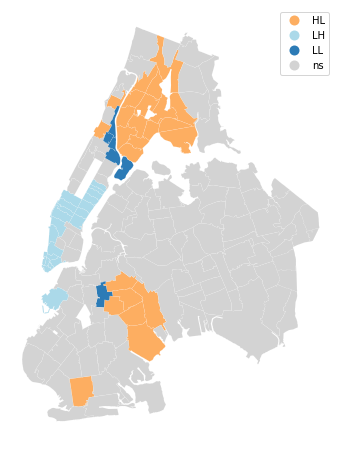

In [173]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc_bv, df, p=0.05, figsize = (8,8))
plt.show()

Result based on only outliers instead of the normal High-High/Low-Low implies - 
#### Low income population even though they stay in proximity to some of the rich neighborhoods report higher cases than rich populations and vice versa 

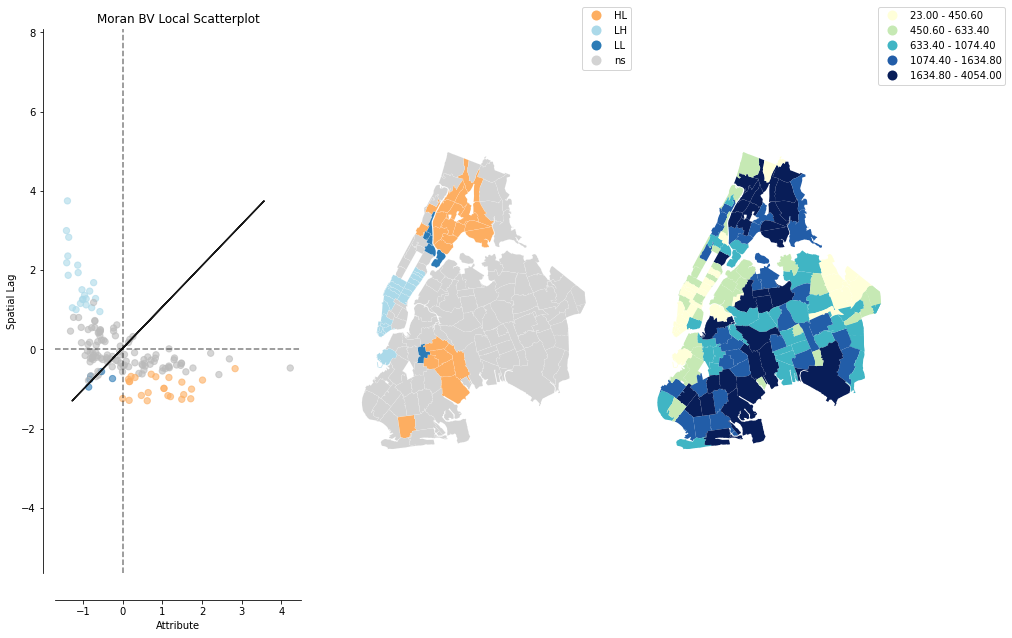

In [144]:
plot_local_autocorrelation(moran_loc_bv, df, 'Positive',figsize = (15,10))
plt.show()

#### Trying other socioeconomic variables

In [147]:
df.columns

Index(['MODZCTA', 'label', 'geometry', 'Positive', 'Total',
       'zcta_cum.perc_pos', 'ZCTA', 'geo_id', 'total_pop', 'male_pop',
       'female_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop',
       'hispanic_pop', 'amerindian_pop', 'other_race_pop',
       'two_or_more_races_pop', 'not_hispanic_pop',
       'commuters_by_public_transportation', 'households', 'median_income',
       'income_per_capita', 'housing_units', 'median_rent',
       'percent_income_spent_on_rent', 'commuters_16_over',
       'commute_less_10_mins', 'commute_35_44_mins', 'commute_60_more_mins',
       'commute_10_14_mins', 'commute_15_19_mins', 'commute_20_24_mins',
       'commute_25_29_mins', 'commute_30_34_mins', 'commute_45_59_mins',
       'aggregate_travel_time_to_work', 'income_less_10000',
       'income_10000_14999', 'income_15000_19999', 'income_20000_24999',
       'income_25000_29999', 'income_30000_34999', 'income_35000_39999',
       'income_40000_44999', 'income_45000_49999', 'income

## Gini Index

In [148]:
c = df['gini_index'].values
moran_c = Moran(c,w)
moran_c.I

0.725183383188764

Positively correlated over space

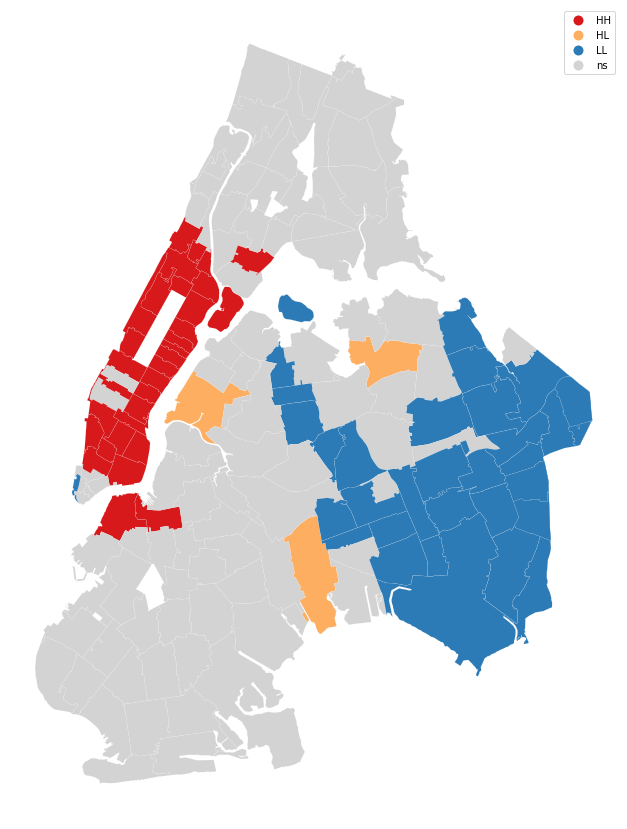

In [149]:
moran_loc_c = Moran_Local(c, w)
lisa_cluster(moran_loc_c, df, p=0.05, figsize = (20,15))
plt.show()

## Bivariate - Gini + Cases

In [150]:
moran_bv_c = Moran_BV(y, c, w)
moran_loc_bv_c = Moran_Local_BV(y, c, w)
moran_bv_c.I

-0.12156947175689384

Weakly negative correlation

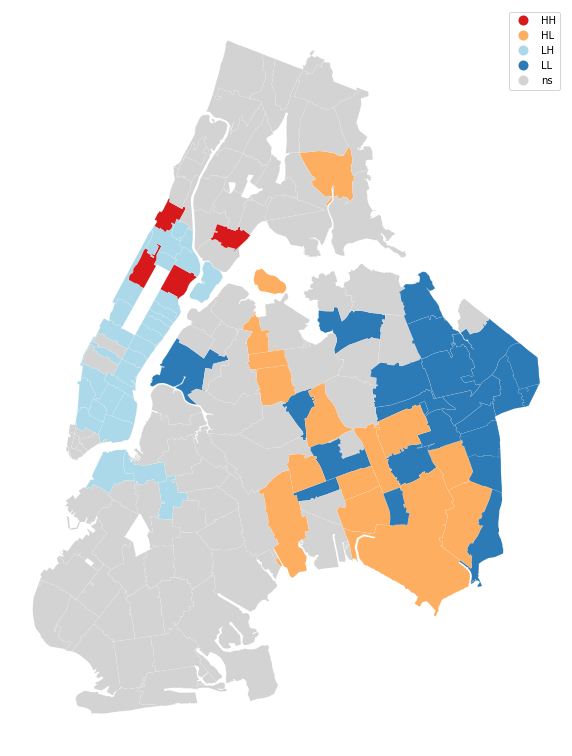

In [151]:
lisa_cluster(moran_loc_bv_c, df, p=0.05, figsize = (10,15))
plt.show()

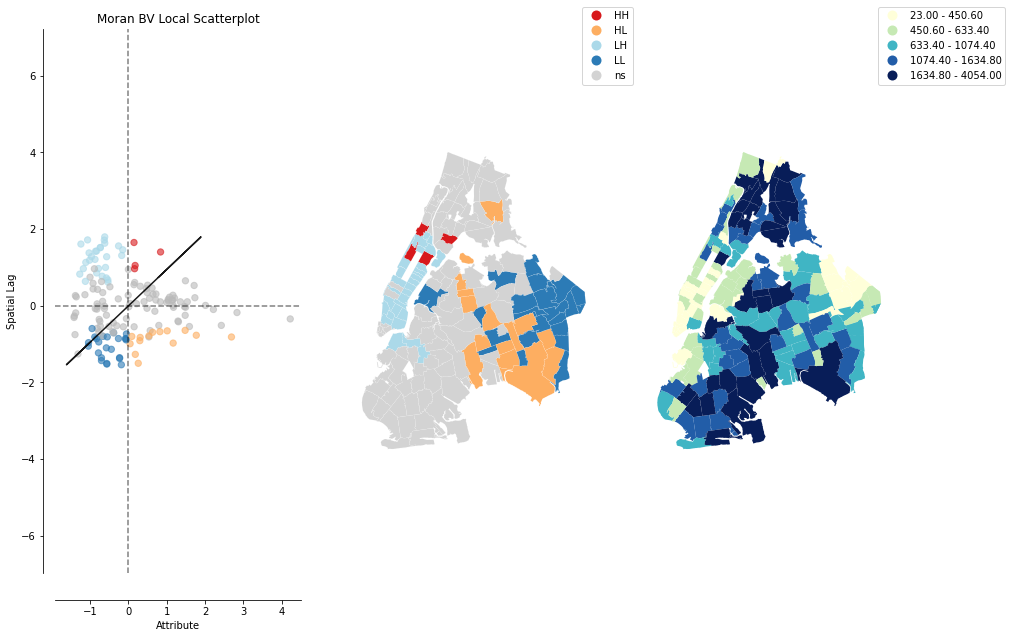

In [152]:
plot_local_autocorrelation(moran_loc_bv_c, df,'Positive',figsize = (15,10))
plt.show()

Interesting Observation : Low values of gini for some neighborhoods in Queens have corresponding low values of cases contrary to the correlation estimate : Could it be since they are disconnected from the pure urban pursuits representative of other zips within New York. Example : Lesser people traveling using public transportation, lesser frequency of travels to busy parts of Manhattan and Brooklyn, having a job in Queens.

## Racial Diversity

In [154]:
r = df['black_pop'].values
moran_r = Moran(r,w)
moran_r.I

0.6246675507900626

Positive Correlation - Populations of colored people are clustered together

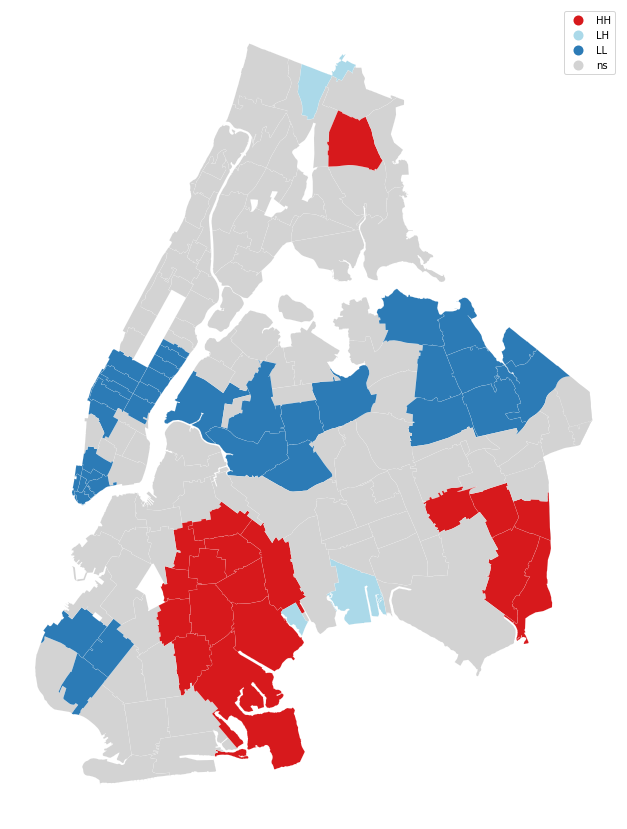

In [155]:
moran_loc_r = Moran_Local(r, w)
lisa_cluster(moran_loc_r, df, p=0.05, figsize = (20,15))
plt.show()

## Bivariate - Race + Cases

In [156]:
moran_bv_r = Moran_BV(y, r, w)
moran_loc_bv_r = Moran_Local_BV(y, r, w)
moran_bv_r.I

0.2915551116790919

In [182]:
moran_loc_bv_r.

158.0

Weakly positively correlated

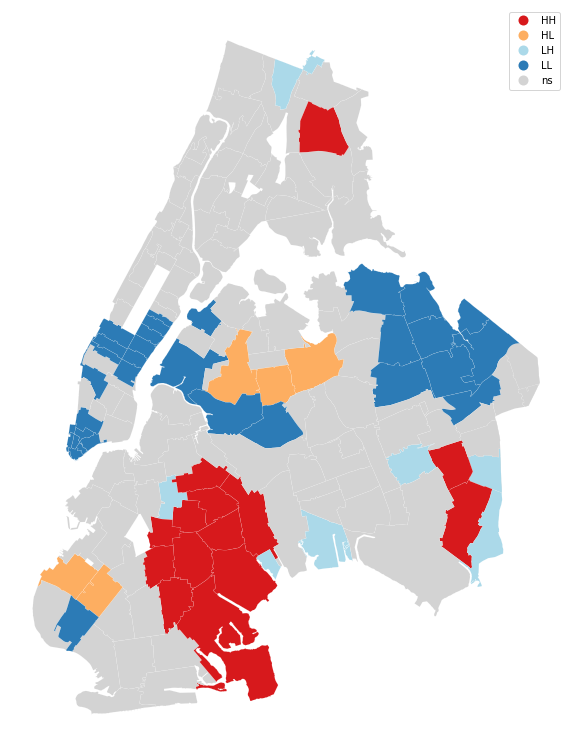

In [157]:
lisa_cluster(moran_loc_bv_r, df, p=0.05, figsize = (10,15))
plt.show()

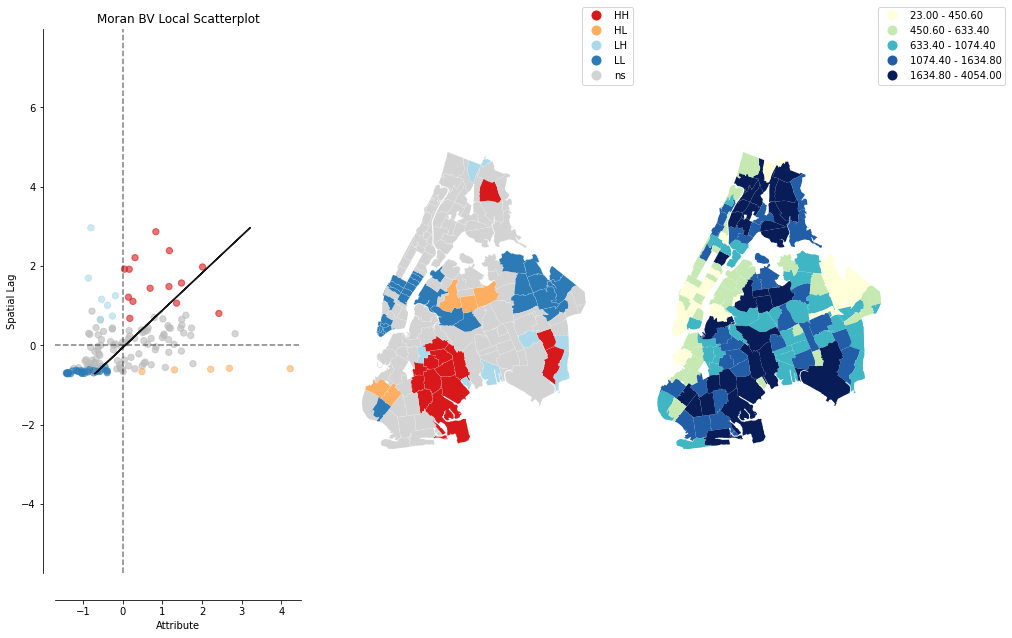

In [177]:
plot_local_autocorrelation(moran_loc_bv_r, df,'Positive',figsize = (15,10))
plt.show()

#### All neighborhoods with highest reported cases also happen to be areas with highest colored populations - Weak positive spatial correlation between geography + race + cases implies : 

#### There are disparities in how colored populations are clustered together and that in turn has a positive correlation on the number of cases

(see yellow and dark red cluster and compare to the map on the right)

## Transportation Access

In [162]:
t = df['commuters_by_subway_or_elevated'].values
moran_t = Moran(t,w)
moran_t.I

0.47436113688282994

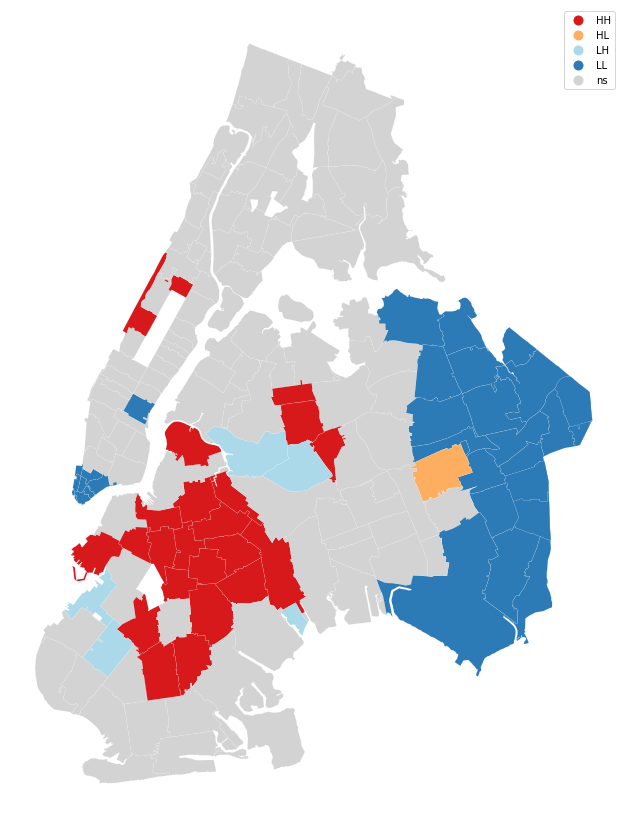

In [163]:
moran_loc_t = Moran_Local(t, w)
lisa_cluster(moran_loc_t, df, p=0.05, figsize = (20,15))
plt.show()

#### Interesting Observation : From Gini Coefficient in earlier map and Commuters using Public Transportation - it is confirmed that neighborhoods in Queens are away from the more "urban" pursuits of New York

## Bivariate - Transport + Cases

In [164]:
moran_bv_t = Moran_BV(y, t, w)
moran_loc_bv_t = Moran_Local_BV(y, t, w)
moran_bv_t.I

0.20605165361964536

Weakly positive correlation 

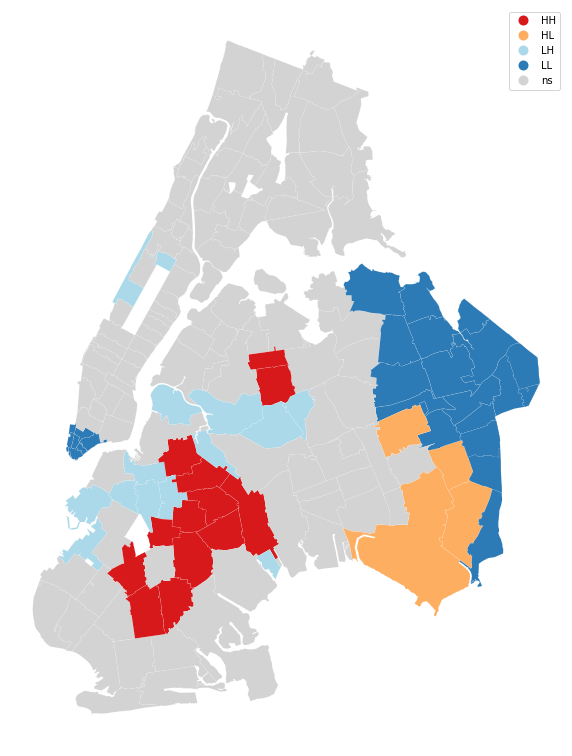

In [166]:
lisa_cluster(moran_loc_bv_t, df, p=0.05, figsize = (10,15))
plt.show()

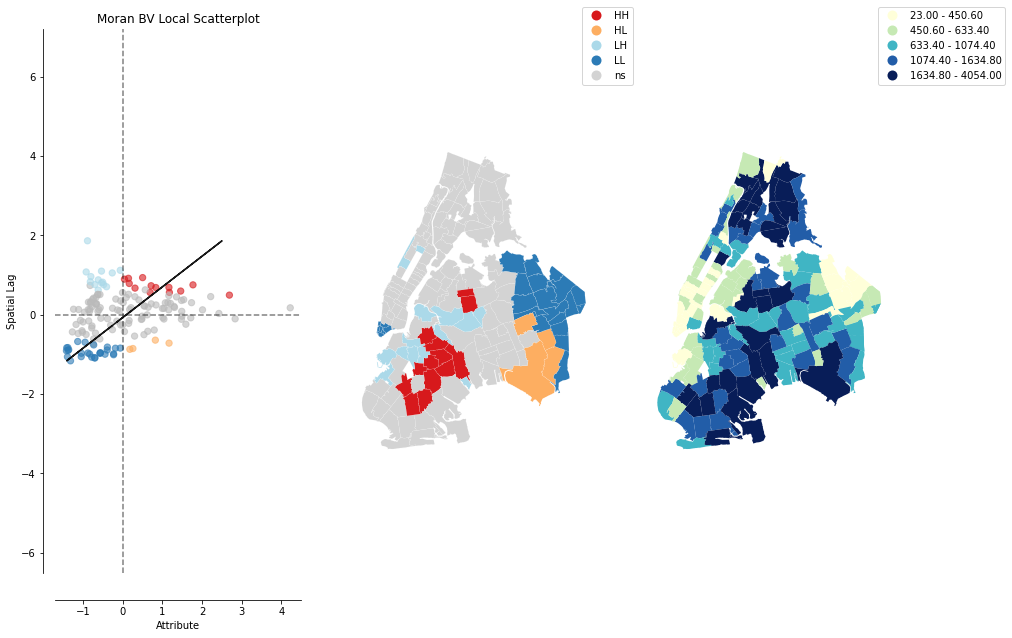

In [168]:
plot_local_autocorrelation(moran_loc_bv_t, df,'Positive',figsize = (15,10))
plt.show()

#### Areas in red : High Commute Times + High Cases. Comparing with actual cases, transportation doesnt seem to be impacting much

## Final Thoughts : Geography in itself only shows a weak positive correlation but when combined with demographic factors we see that population of people with poor access to social services are usually clustered together in space and have high values of Covid cases reported.

## In second notebook, high comorbidities amongst poorer populations is found to be the cause for disparate number of cases

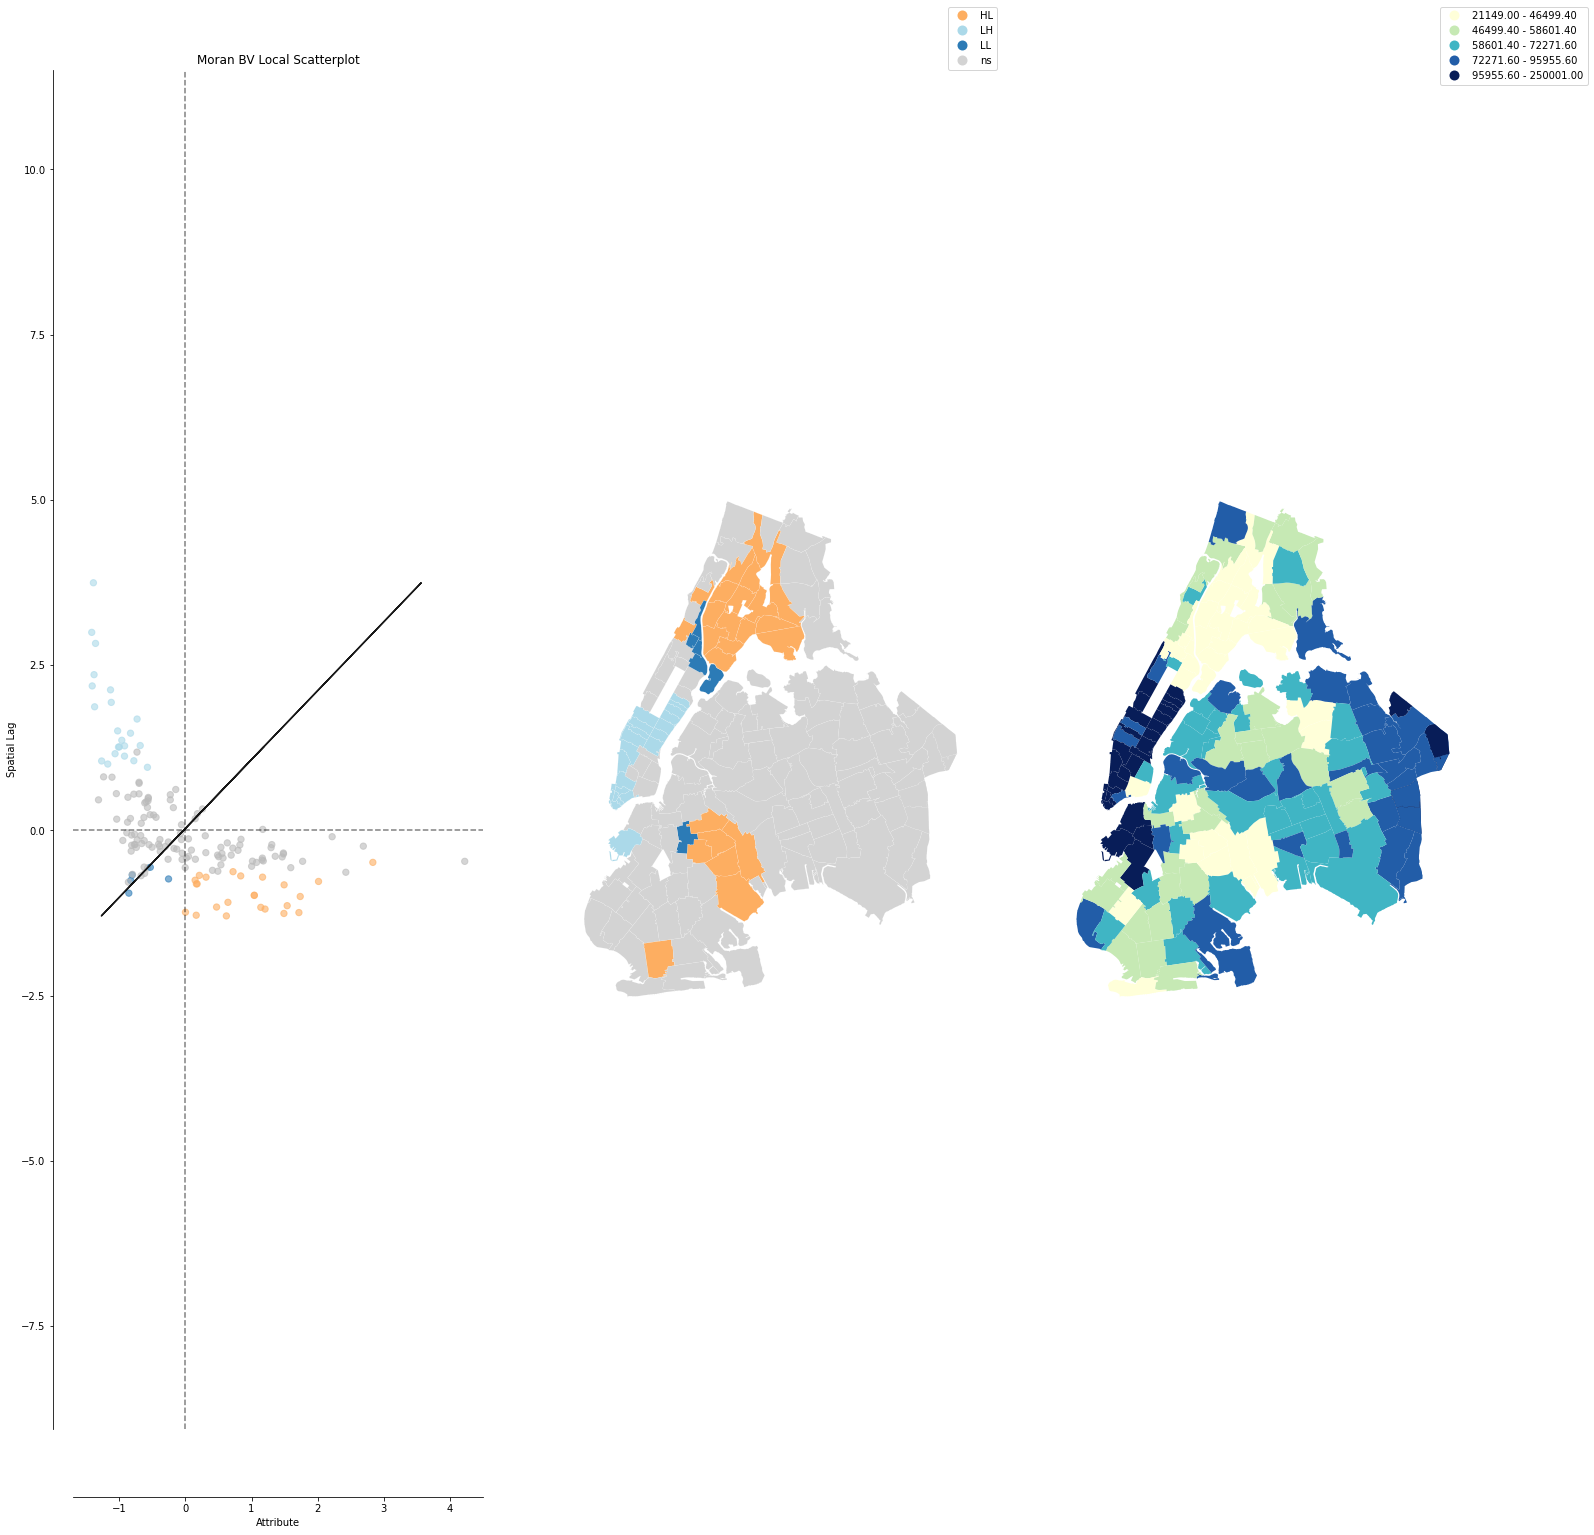

In [175]:
plot_local_autocorrelation(moran_loc_bv, df, 'median_income',figsize = (25,25))
plt.show()